# 1.2 DATA PROCESSING

In [21]:
import pandas as pd

In [22]:
df=pd.read_csv('Experimental dataset/credit/credit.csv',index_col=0)
df.head()

,Target,Nation,Birth_Place,Gender,Age,Marriage_State,Highest Education,House_State,Work_Years,Title,...,ZX_Max_Overdue_Account,ZX_Link_Max_Overdue_Amount,ZX_Total_Overdu_Months,ZX_Max_Overdue_Duration,ZX_Max_Credits,ZX_Max_Credit_Banks,ZX_Max_Overdue_Credits,ZX_Credit_Max_Overdu_Amount,ZX_Credit_Total_Overdue_Months,ZX_Credit_Max_Overdue_Duration
Cust_No,,,,,,,,,,,,,,,,,,,,,
2,0,1.0,330621,1,55,40.0,71.0,1.0,0,9.0,...,1,0,2,1,1,1,0,0,0,0
4,0,1.0,330621,0,40,99.0,90.0,1.0,0,NaN,...,0,0,0,0,0,0,0,0,0,0
6,0,1.0,330621,1,45,20.0,71.0,1.0,0,NaN,...,1,23,3,1,2,2,0,0,0,0
7,0,NaN,330421,0,32,20.0,21.0,1.0,0,NaN,...,1,1,3,1,1,1,0,0,0,0
8,0,1.0,330621,0,46,20.0,71.0,NaN,0,NaN,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

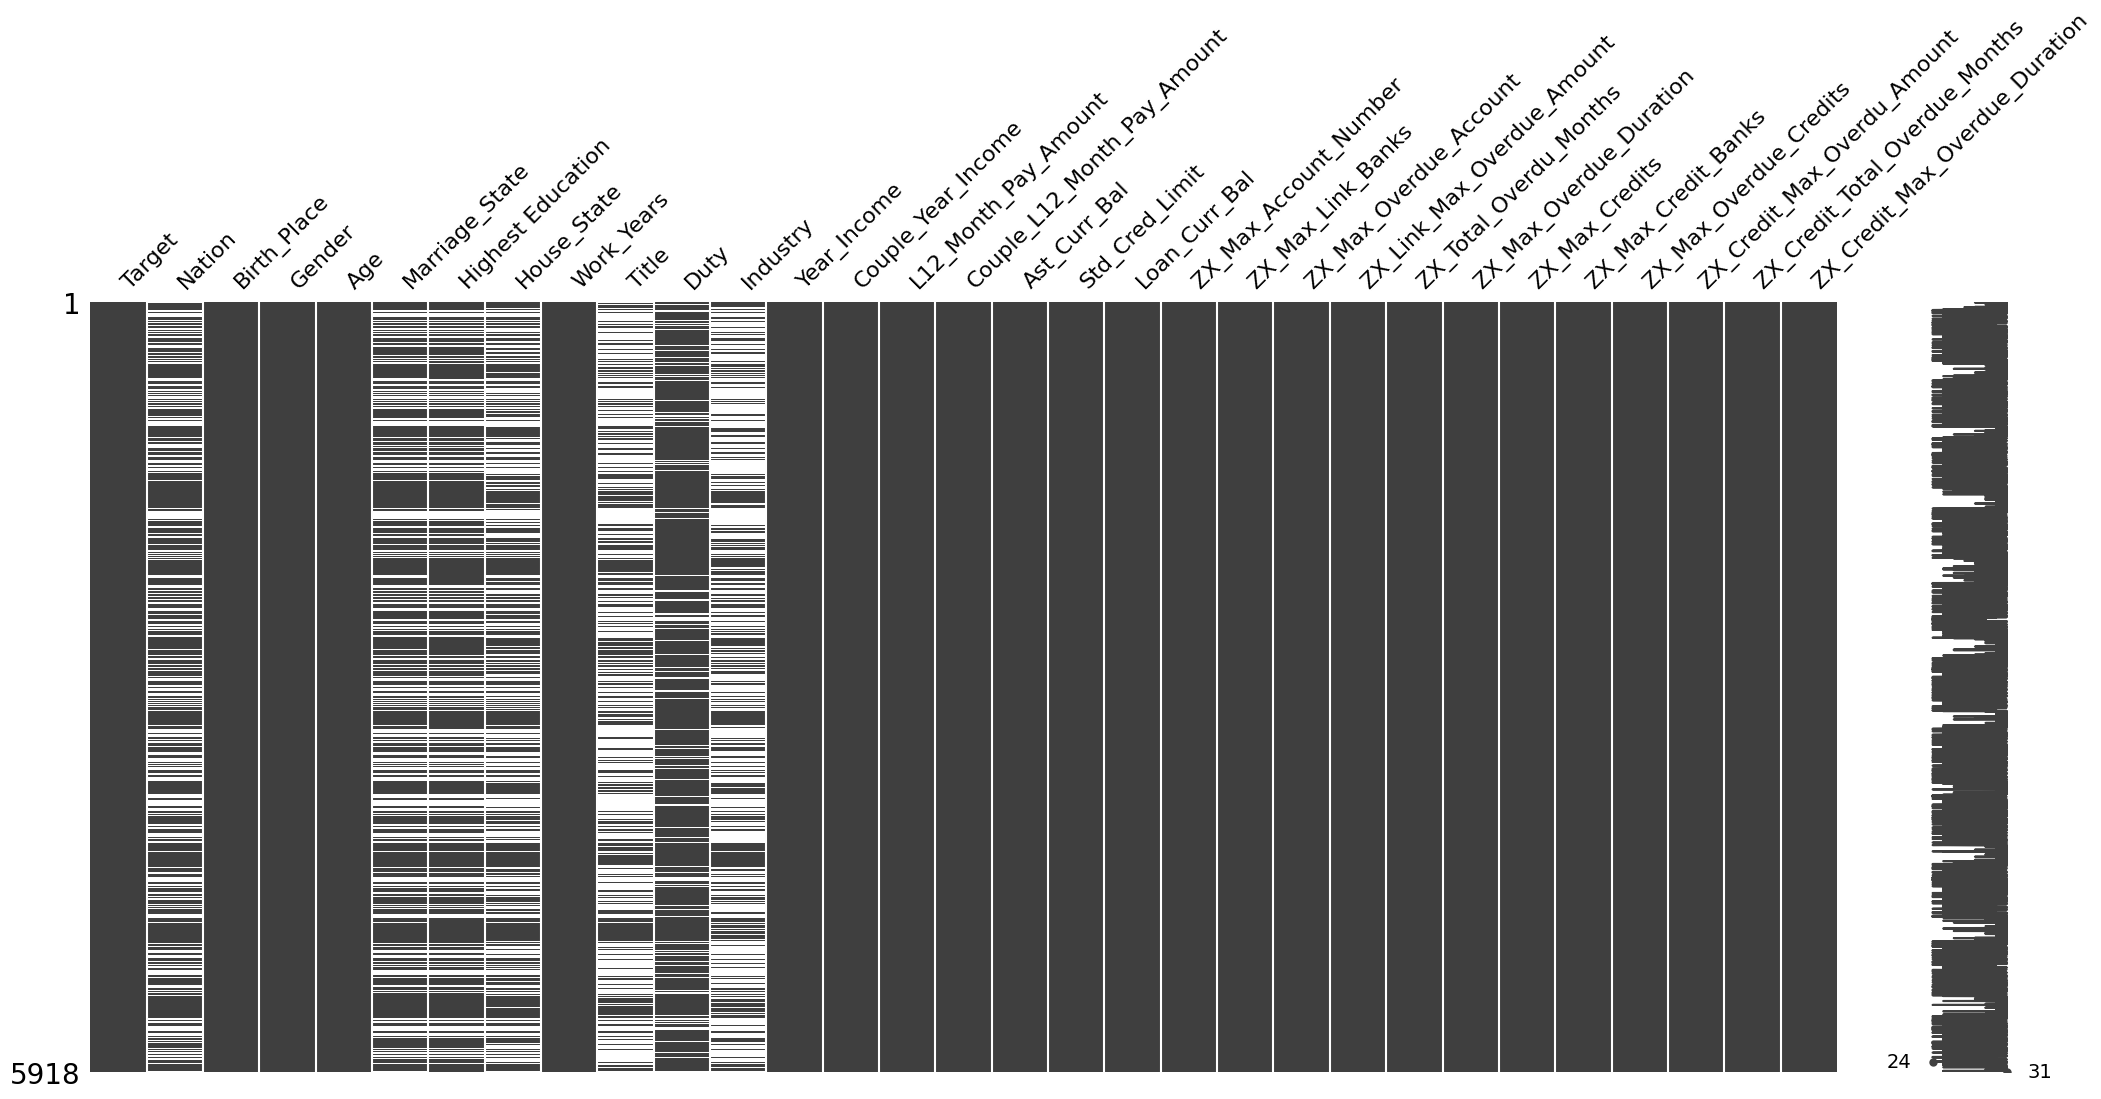

In [23]:
import missingno # Import the missingno package.
missingno.matrix(df)

In [24]:
df_missing = pd.DataFrame(df.isnull().sum()/df.shape[0],columns=['missing_rate']).reset_index()
df_missing.sort_values(by='missing_rate',ascending=False)[:15]

,index,missing_rate
9,Title,0.603075
11,Industry,0.594120
7,House_State,0.424806
1,Nation,0.356877
5,Marriage_State,0.334404
6,Highest Education,0.325786
10,Duty,0.126563
25,ZX_Max_Credits,0.000000
21,ZX_Max_Overdue_Account,0.000000
22,ZX_Link_Max_Overdue_Amount,0.000000


In [25]:
missing_col = ['Title','Industry','House_State','Nation','Marriage_State','Highest Education','Duty']

In [26]:
for col in missing_col:
   df[col]=df[col].fillna(int(df[col].mode()))

C:\Users\Lintang\AppData\Local\Temp\ipykernel_26772\2326721831.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  df[col]=df[col].fillna(int(df[col].mode()))


In [27]:
df_missing_2 = pd.DataFrame(df.isnull().sum()/df.shape[0],columns=['missing_rate']).reset_index()
df_missing_2.sort_values(by='missing_rate',ascending=False)[:15]

,index,missing_rate
0,Target,0.0
16,Ast_Curr_Bal,0.0
29,ZX_Credit_Total_Overdue_Months,0.0
28,ZX_Credit_Max_Overdu_Amount,0.0
27,ZX_Max_Overdue_Credits,0.0
26,ZX_Max_Credit_Banks,0.0
25,ZX_Max_Credits,0.0
24,ZX_Max_Overdue_Duration,0.0
23,ZX_Total_Overdu_Months,0.0
22,ZX_Link_Max_Overdue_Amount,0.0


# 1.3 FEATURE SELECTION

In [28]:
cross_table = pd.crosstab(df.House_State,columns = df.Target,margins=True)
cross_table_rowpct = cross_table.div(cross_table['All'],axis = 0)
cross_table_rowpct

Target,0,1,All
House_State,,,
1.0,0.980996,0.019004,1.0
2.0,0.954545,0.045455,1.0
3.0,0.941176,0.058824,1.0
4.0,1.000000,0.000000,1.0
5.0,0.980392,0.019608,1.0
6.0,1.000000,0.000000,1.0
7.0,0.857143,0.142857,1.0
8.0,1.000000,0.000000,1.0
All,0.980399,0.019601,1.0


In [29]:
X = df.drop('Target',axis=1)
y = df['Target']
X_category=df[['Nation','Birth_Place','Gender','Marriage_State','Highest Education',
               'House_State','Work_Years','Title','Duty','Industry']]

In [30]:
from sklearn.feature_selection import chi2

(chi2,pval) = chi2(X_category,y)
dict_feature = {}

for i,j in zip(X_category.columns.values,chi2):
   dict_feature[i]=j
   
ls = sorted(dict_feature.items(),key=lambda item:item[1],reverse=True)
ls

[('Work_Years', 30037.98992988671),
 ('Birth_Place', 2337.714562647344),
 ('Marriage_State', 42.7575821276435),
 ('Duty', 30.50877073893663),
 ('Industry', 25.452013582101742),
 ('Nation', 5.256723621174332),
 ('Gender', 2.309012664555949),
 ('Highest Education', 1.2297808819626934),
 ('Title', 0.8774406202190365),
 ('House_State', 0.3184384017473372)]

In [31]:
nominal_features = ['Nation','Birth_Place','Gender','Marriage_State','Highest Education',
                    'House_State','Work_Years','Unit_Kind','Title', 'Occupation','Duty','Industry']
numerical_features = [col_ for col_ in df.columns if col_ not in nominal_features ]
numerical_features.pop(0) # Delete the first element from the list.
X_num = df[numerical_features]

<Axes: >

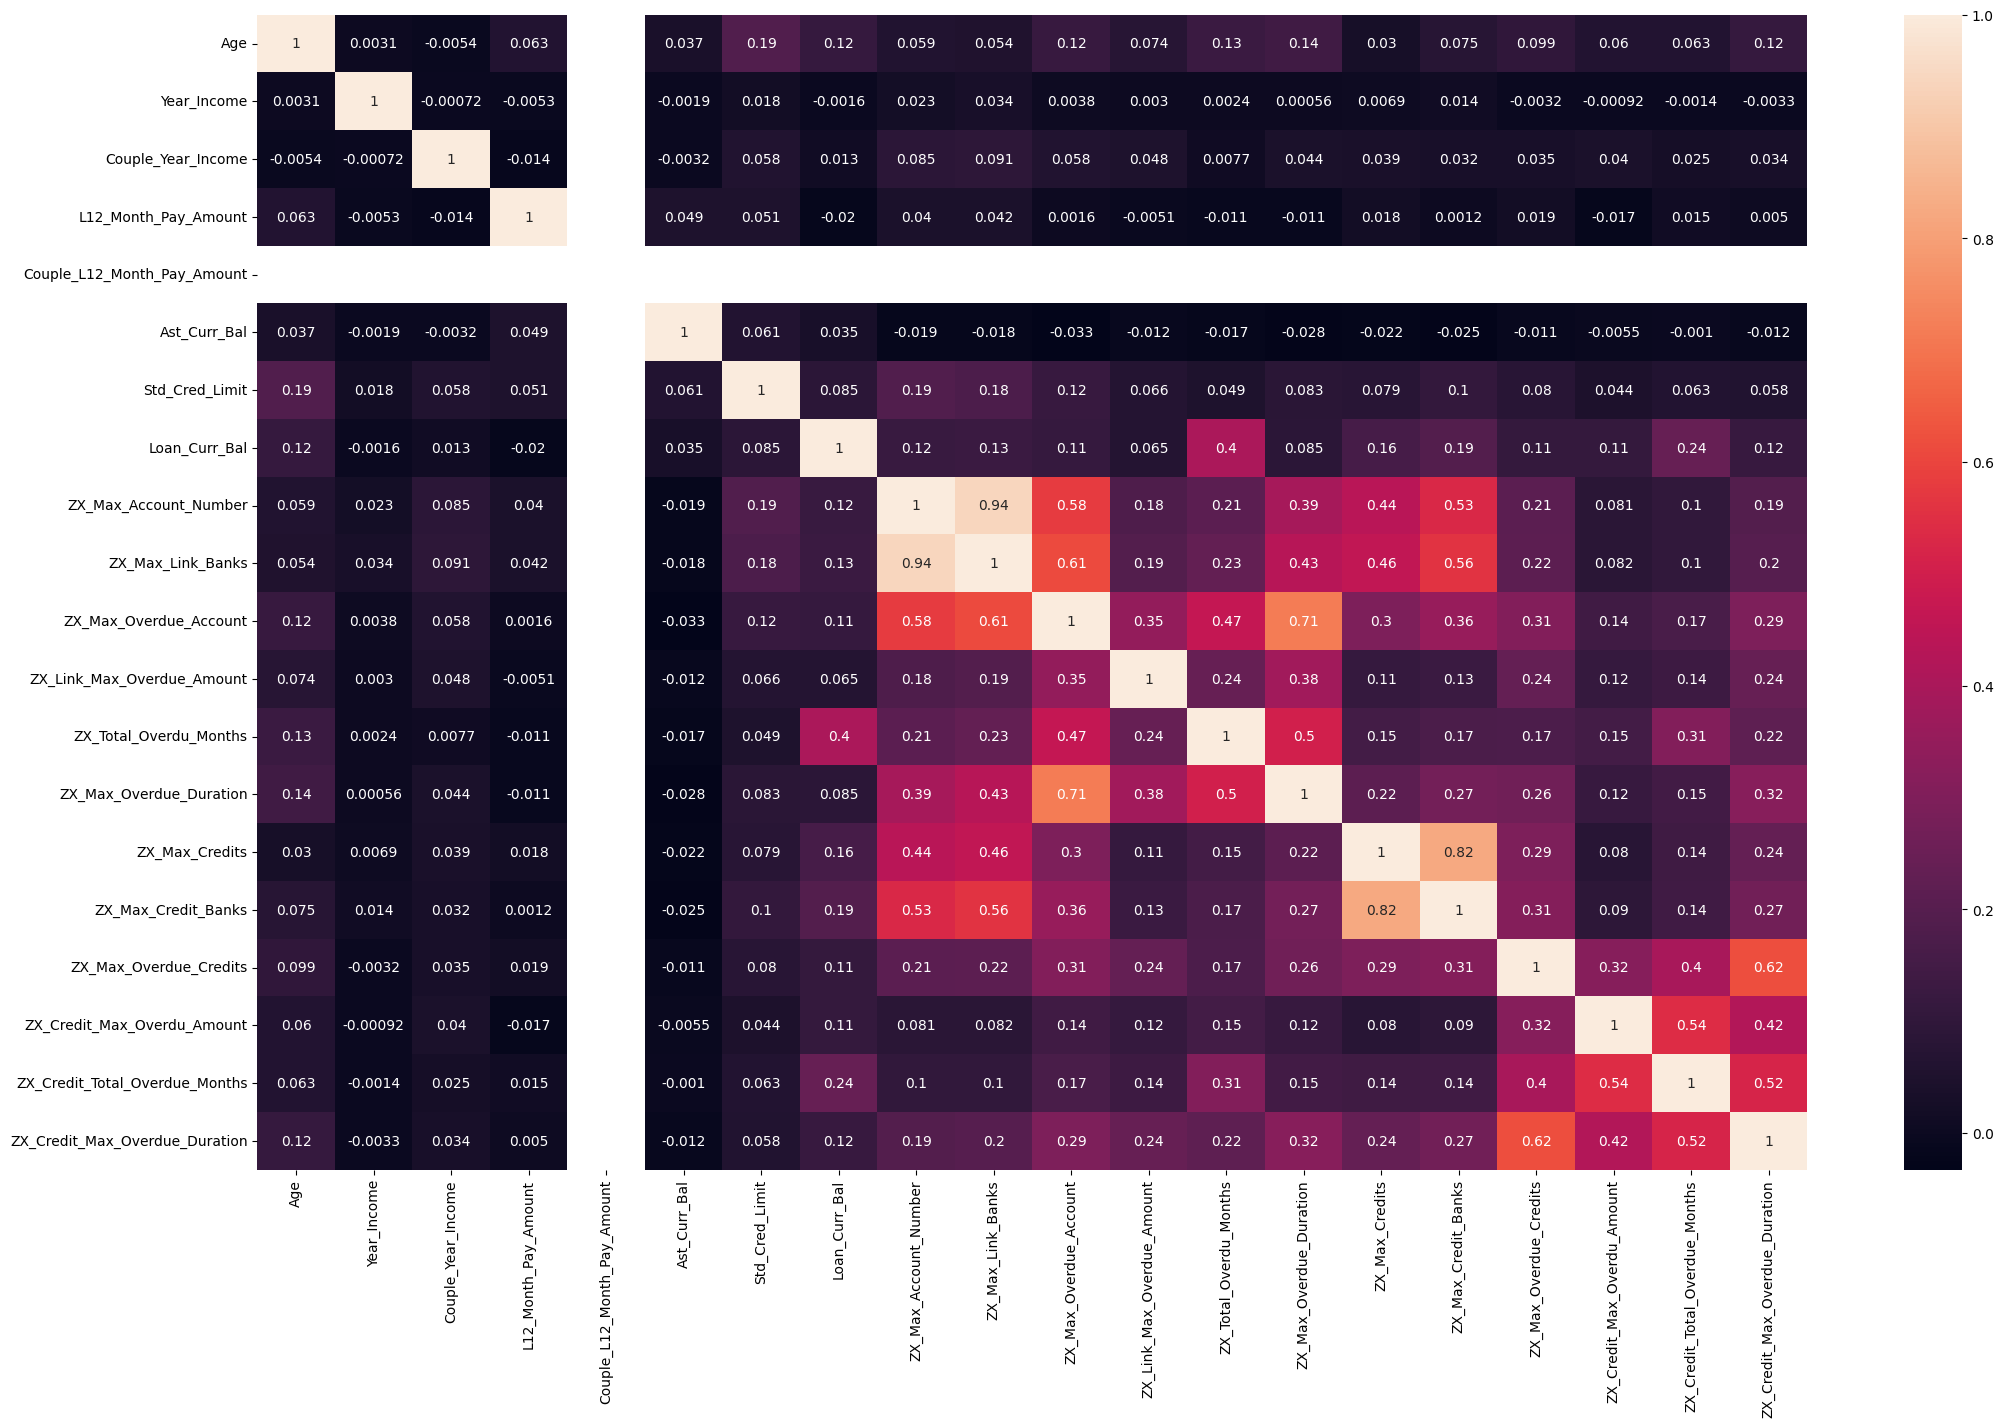

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = X_num.corr(method='pearson')
plt.figure(figsize=(25, 15))
sns.heatmap(corr_matrix, annot= True) # Display the correlation between the heatmap and variables in a visualize manner.

In [33]:
cols_pair = []
for index_ in corr_matrix.index:
   for col_ in corr_matrix.columns:
      if corr_matrix.loc[index_,col_] >= 0.8 and index_!=col_ and (col_,index_) not in cols_pair:
         cols_pair.append((index_,col_))
cols_pair

[('ZX_Max_Account_Number', 'ZX_Max_Link_Banks'),
 ('ZX_Max_Credits', 'ZX_Max_Credit_Banks')]

In [34]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
x_rfe=RFE(estimator=LogisticRegression(), n_features_to_select=20).fit(X, y)
print(x_rfe.n_features_ )
print(x_rfe.support_ )
print(x_rfe.ranking_ )
print(x_rfe.estimator_ )

c:\Users\Lintang\anaconda3\envs\MS20_1\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Lintang\anaconda3\envs\MS20_1\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

20
[False  True False  True  True  True False  True False  True  True  True
  True  True False  True  True False  True  True  True  True  True  True
 False False False  True  True False]
[ 4  1  9  1  1  1 10  1  2  1  1  1  1  1 11  1  1  5  1  1  1  1  1  1
  3  8  7  1  1  6]
LogisticRegression()


In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X,y)

RandomForestClassifier()

In [36]:
cols=[i for i in X.columns]
sorted_feature=sorted(zip(map(lambda x:round(x,4),rfc.feature_importances_),cols),reverse=True)
sorted_feature

[(0.1415, 'Ast_Curr_Bal'),
 (0.1149, 'Age'),
 (0.0849, 'Year_Income'),
 (0.0655, 'Std_Cred_Limit'),
 (0.0428, 'ZX_Link_Max_Overdue_Amount'),
 (0.0424, 'ZX_Max_Account_Number'),
 (0.0399, 'Highest Education'),
 (0.0389, 'ZX_Total_Overdu_Months'),
 (0.0324, 'ZX_Max_Link_Banks'),
 (0.0323, 'Birth_Place'),
 (0.0317, 'ZX_Max_Overdue_Account'),
 (0.0309, 'Duty'),
 (0.0286, 'Industry'),
 (0.0275, 'Couple_Year_Income'),
 (0.0254, 'Loan_Curr_Bal'),
 (0.0251, 'Marriage_State'),
 (0.0248, 'ZX_Max_Credit_Banks'),
 (0.0246, 'ZX_Max_Overdue_Duration'),
 (0.0209, 'L12_Month_Pay_Amount'),
 (0.0192, 'ZX_Max_Credits'),
 (0.0171, 'ZX_Credit_Max_Overdu_Amount'),
 (0.0137, 'ZX_Credit_Total_Overdue_Months'),
 (0.0127, 'ZX_Credit_Max_Overdue_Duration'),
 (0.0125, 'Gender'),
 (0.0124, 'Work_Years'),
 (0.011, 'ZX_Max_Overdue_Credits'),
 (0.0106, 'Title'),
 (0.0089, 'Nation'),
 (0.0069, 'House_State'),
 (0.0, 'Couple_L12_Month_Pay_Amount')]

In [37]:
del_cols =['Gender','House_State','Couple_Year_Income','Loan_Curr_Bal','ZX_Max_Credit_Banks',
           'ZX_Max_Overdue_Credits','ZX_Credit_Max_Overdu_Amount','ZX_Credit_Max_Overdue_Duration']
df_select = df.drop(del_cols,axis=1)
df_select.head()

,Target,Nation,Birth_Place,Age,Marriage_State,Highest Education,Work_Years,Title,Duty,Industry,...,Ast_Curr_Bal,Std_Cred_Limit,ZX_Max_Account_Number,ZX_Max_Link_Banks,ZX_Max_Overdue_Account,ZX_Link_Max_Overdue_Amount,ZX_Total_Overdu_Months,ZX_Max_Overdue_Duration,ZX_Max_Credits,ZX_Credit_Total_Overdue_Months
Cust_No,,,,,,,,,,,,,,,,,,,,,
2,0,1.0,330621,55,40.0,71.0,0,9.0,9.0,52.0,...,523.32,10000,2,2,1,0,2,1,1,0
4,0,1.0,330621,40,99.0,90.0,0,9.0,2.0,51.0,...,2305.25,20000,4,4,0,0,0,0,0,0
6,0,1.0,330621,45,20.0,71.0,0,9.0,0.0,17.0,...,17299.71,20000,9,5,1,23,3,1,2,0
7,0,1.0,330421,32,20.0,21.0,0,9.0,0.0,83.0,...,122.24,20000,12,3,1,1,3,1,1,0
8,0,1.0,330621,46,20.0,71.0,0,9.0,0.0,51.0,...,91.82,5000,0,0,0,0,0,0,0,0


# 1.4 FEATURE CONSTRUCTION

In [38]:
from sklearn.preprocessing import PolynomialFeatures

poly_feature = df[['Ast_Curr_Bal','Age','Year_Income','Std_Cred_Limit']] # Select fields used to construct the polynomial feature.
poly_trans = PolynomialFeatures(degree = 3)
ptf = poly_trans.fit(poly_feature) # Invoke the fit() method to construct the polynomial feature.
poly_feature = poly_trans.transform(poly_feature) # Convert data.

In [39]:
poly_features=pd.DataFrame(poly_feature,columns
                           =poly_trans.get_feature_names_out(['Ast_Curr_Bal','Age','Year_Income','Std_Cred_Limit']))
poly_features['Target']=y
poly_features.head()

,1,Ast_Curr_Bal,Age,Year_Income,Std_Cred_Limit,Ast_Curr_Bal^2,Ast_Curr_Bal Age,Ast_Curr_Bal Year_Income,Ast_Curr_Bal Std_Cred_Limit,Age^2,...,Age^2 Year_Income,Age^2 Std_Cred_Limit,Age Year_Income^2,Age Year_Income Std_Cred_Limit,Age Std_Cred_Limit^2,Year_Income^3,Year_Income^2 Std_Cred_Limit,Year_Income Std_Cred_Limit^2,Std_Cred_Limit^3,Target
0,1.0,523.32,55.0,100000.0,10000.0,2.738638e+05,28782.60,5.233200e+07,5233200.0,3025.0,...,302500000.0,30250000.0,5.500000e+11,5.500000e+10,5.500000e+09,1.000000e+15,1.000000e+14,1.000000e+13,1.000000e+12,NaN
1,1.0,2305.25,40.0,300000.0,20000.0,5.314178e+06,92210.00,6.915750e+08,46105000.0,1600.0,...,480000000.0,32000000.0,3.600000e+12,2.400000e+11,1.600000e+10,2.700000e+16,1.800000e+15,1.200000e+14,8.000000e+12,NaN
2,1.0,17299.71,45.0,150000.0,20000.0,2.992800e+08,778486.95,2.594956e+09,345994200.0,2025.0,...,303750000.0,40500000.0,1.012500e+12,1.350000e+11,1.800000e+10,3.375000e+15,4.500000e+14,6.000000e+13,8.000000e+12,0.0
3,1.0,122.24,32.0,80000.0,20000.0,1.494262e+04,3911.68,9.779200e+06,2444800.0,1024.0,...,81920000.0,20480000.0,2.048000e+11,5.120000e+10,1.280000e+10,5.120000e+14,1.280000e+14,3.200000e+13,8.000000e+12,NaN
4,1.0,91.82,46.0,50000.0,5000.0,8.430912e+03,4223.72,4.591000e+06,459100.0,2116.0,...,105800000.0,10580000.0,1.150000e+11,1.150000e+10,1.150000e+09,1.250000e+14,1.250000e+13,1.250000e+12,1.250000e+11,0.0


In [40]:
poly_corrs = poly_features.corr()['Target'].sort_values()
print("five features with the smallest correlation coefficients: \n",poly_corrs.head(5))
print("five features with the largest correlation coefficients: \n",poly_corrs.tail(5))

five features with the smallest correlation coefficients: 
 Age^3                  -0.010601
Age^2                  -0.009275
Age^2 Std_Cred_Limit   -0.008064
Age                    -0.007356
Age Std_Cred_Limit     -0.006834
Name: Target, dtype: float64
five features with the largest correlation coefficients: 
 Year_Income^3      -0.001910
Ast_Curr_Bal Age   -0.001114
Ast_Curr_Bal        0.002849
Target              1.000000
1                        NaN
Name: Target, dtype: float64
